<a href="https://colab.research.google.com/github/clairey551/cy/blob/master/Moneyball_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> Welcome to the Moneyball Project! 💸⚾ </b></h1>

<center> <img src="https://m.media-amazon.com/images/I/61M8k4a4LAL._AC_UF1000,1000_QL80_.jpg", width="300">





We hope you're ready to dive into the world of baseball statistics! You and your group are going to do a statistical analysis on a baseball dataset in order to find the metrics that best predict success as well as finding the most undervalued players.

In order to understand how to solve this problem, this notebook will focus on introducing you to the rules of baseball as well as a dataset describing team performance

We'll start by understanding our problem, identifying:
* Who are our key stakeholders?
* What do they want to solve?
* What kind of data do they have?

Once we have all of this information, we will take a step back and develop a well-considered plan for designing our solution.


# Milestone 1: Background


## The *Moneyball* Story

<center>
<img src="https://img.mlbstatic.com/mlb-images/image/private/t_16x9/t_w1024/mlb/hlqgheriebljihykc6dv" width="500" >
</center>

*Moneyball* is a book and a movie based on the real-life experiences of Billy Beane, who was the general manager of the Oakland Athletics baseball team in the early 2000s. The Moneyball story revolves around Beane's innovative approach to assembling a competitive team on a limited budget, using statistical analysis to identify undervalued players and build a winning team. You'll be doing the same thing in this project!

At the time, baseball teams often relied on traditional scouting methods to evaluate players, such as watching them play in person and relying on opinions. Beane, however, believed that statistical analysis could be used to identify players who were undervalued by other teams, and therefore could be acquired at a lower cost.

Despite skepticism from many in the baseball community, Beane's approach proved successful, as the Athletics went on to make the playoffs in several consecutive years despite having one of the lowest payrolls in the league. The Moneyball story has since become a popular example of how data-driven decision making can lead to success in sports and other fields.



### 💡 Discussion Questions

- How might the increased use of statistical analysis in baseball change the way the game is played and managed?
  - Some argued that increased use of statistical analysis would lead to a decrease in the importance of "intangibles" like leadership and team chemistry. Do you agree with this perspective? Why or why not?
- How might the use of statistical analysis in baseball change in the future? What new metrics or technologies might be developed to enhance our understanding of the game?

For more information on the importance of the *Moneyball* story and how it relates to the state of sports analytics today, take a look at [this project's background article](https://www.forbes.com/sites/randybean/2022/09/18/moneyball-20-years-later-a-progress-report-on-data-and-analytics-in-professional-sports/)!

## The Basics of Baseball


Now that we have some overall context for the project, we can start learning about the basics of baseball! Take some time to watch the following video, and make sure you understand how the game works overall!

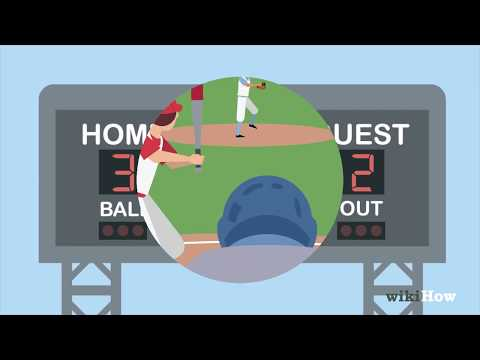

In [ ]:
#@title Run this to watch the Baseball Basics Video: { display-mode: "form" }
from IPython.display import YouTubeVideo
YouTubeVideo('WMA8L5OpuDY', height=450, width=800)

# Another more detailed video to maybe use?
# https://www.youtube.com/watch?v=skOsApsF0jQ&ab_channel=NinhLy

## Important Vocabulary

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Baseball_diamond_simplified.svg/650px-Baseball_diamond_simplified.svg.png?20070130195722" width="500">
</center>


Our dataset contains several features for teams that have competed in the Major Leagues in baseball. In order to better understand these columns, here are a few definitions!

- ***At-bat***: The number of times a batter comes up to bat
  - This technically excludes appearances with specific results, like walks, sacrifices, and hits by pitch, defined briefly below
- ***Hit***: The number of times a batter safely reaches base by hitting the ball in fair territory
  - When a batter is able to reach first, second or third base safely after hitting, it's referred to as a ***Single***, ***Double*** or ***Triple***, respectively.
  - On the other hand, ***Home Runs*** are the number of hits where the batter is able to make it back to home base and score a run.
- ***Run***: The number of times a player successfully advances around all four bases to score a point for their team
  - Note that this is different from a home run! Runs also include points scored from players who were already on base and were able to score with the help of another batter's hit.
- Other metrics we'll focus more on later:
  - ***Hit By Pitch*** - when a batter is allowed first base after being hit by a pitch
  - ***Walk*** - when a batter is allowed first base after 4 bad pitches
  - ***Sacrifice Fly*** - when a batter hits a ball high into the air, sacrificing himself to allow people on base to advance and score a run


More metrics can be found at **https://www.mlb.com/glossary**! Note that this glossary also includes the abbreviations for these metrics that are often used (for example, "AB" for At-bat and "2B" for Double).






### 💡 Discussion Questions
Phew, that's a lot of terminology! 🤯

Once you've talked through and understand these terms, start thinking about how you might use them. Take some time to answer the following questions!


In [ ]:
#@markdown 1) Which metrics might be useful for predicting a team's success?
Answer1 = 'runs' #@param {type:"string"}

#@markdown 2) While we have a ton of statistics to work with already, what are some ways we could combine them to make better metrics?
Answer2 = '' #@param {type:"string"}

# Milestone 2: Data Exploration

In [ ]:
#@title Run this to download data and prepare our environment!
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Get Sean Lahman teams dataset, which contains data on team performance all the way back to 1871
teams = pd.read_csv("https://drive.google.com/uc?id=1kbfBhzHNqfg4Af81mdGRTyMKPt1kCGUu")

# Focus on most recent 50 years of data, and ignore seasons shortened by strikes and the pandemic
#Credit: John Basbagill; thanks for poining these years out!
teams = teams.loc[(teams["yearID"] > 1972)  &
                  (teams["yearID"] != 1981) &
                  (teams["yearID"] != 1994) &
                  (teams["yearID"] != 2020)]

# Remove irrelevant columns
columns_to_drop =  [
                    # team IDs in other datasets
                    'teamIDBR', 'teamIDlahman45', 'teamIDretro',

                    # IDs for franchise, division, league
                    'franchID', 'divID', 'lgID',

                    # other success metrics
                    'DivWin', 'WCWin', 'LgWin', 'WSWin', 'Rank',

                    # Batting/Pitching Park Factor and related features
                    'BPF', 'PPF', 'Ghome', 'park', 'attendance',

                    # more batting stats
                    'SB', 'CS', 'SO',

                    # misc defense/pitching stats
                    'ER', 'E', 'CG', 'SHO', 'SV', 'IPouts', 'DP', 'FP',
                    'ERA', 'RA', 'HA', 'HRA', 'BBA', 'SOA'
                    ]
teams = teams.drop(columns=columns_to_drop)

# Rename columns to be more descriptive
abbrev_map = {
    "R" : "Runs",

    "AB" : "AtBats",

    "H" : "Hits",
    "2B" : "Doubles",
    "3B" : "Triples",
    "HR" : "HomeRuns",

    "BB" : "Walks",
    "HBP" : "HitsByPitch",
    "SF" : "SacrificeFlies",

    "W" : "Wins",
    "L" : "Losses",
    "G" : "Games",
}
teams = teams.rename(columns=abbrev_map)

# Move team name column
teams.insert(teams.columns.get_loc('teamID') + 1, 'Name',
              teams.pop("name"))

teams.reset_index(inplace=True, drop=True)

Now that we've discussed plenty of background, let's start to take a look at the data! Soon you'll be able to understand statistics like the ones on this baseball card:

<center><img src="https://www.loc.gov/static/exhibitions/baseball-americana/images/objects/the-art-and-science-of-baseball/the-art-of-winning/ba0075_standard.jpg">

### ✍ Exercise

We've loaded in the data for you, in the dataframe `teams`. Use the cell below to print out the first 9 elements of our data.

*Hint: Which method have we previously used to see the first 5 elements of our data?*

In [ ]:
### YOUR CODE HERE
teams.head(9)

,yearID,teamID,Name,Games,Wins,Losses,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,HitsByPitch,SacrificeFlies
0,1973,ATL,Atlanta Braves,162,76,85,799,5631,1497,219,34,206,608,34.0,46.0
1,1973,BAL,Baltimore Orioles,162,97,65,754,5537,1474,229,48,119,648,43.0,49.0
2,1973,BOS,Boston Red Sox,162,89,73,738,5513,1472,235,30,147,581,31.0,44.0
3,1973,CAL,California Angels,162,79,83,629,5505,1395,183,29,93,509,34.0,45.0
4,1973,CHA,Chicago White Sox,162,77,85,652,5475,1400,228,38,111,537,32.0,42.0
5,1973,CHN,Chicago Cubs,161,77,84,614,5363,1322,201,21,117,575,20.0,37.0
6,1973,CIN,Cincinnati Reds,162,99,63,741,5505,1398,232,34,137,639,31.0,51.0
7,1973,CLE,Cleveland Indians,162,71,91,680,5592,1429,205,29,158,471,32.0,43.0
8,1973,DET,Detroit Tigers,162,85,77,642,5508,1400,213,32,157,509,39.0,31.0


### 💡 Discussion Question

What does each row represent?

### ✍ Exercise

Let's take a closer look at all the data we have to work with! First, let's figure out the range of the years of data. In the code cell below, print the result of calling the `.min()` and `.max()` methods on the `yearID` column.

*Hint: Above, we called the `.head()` method on the entire dataset. How can we get just the `yearID` column of the dataset, and how would we use these new methods on that column?*

In [ ]:
### YOUR CODE HERE
print(teams['yearID'].min())
print(teams['yearID'].max())

1973
2022


### ✍ Exercise

Now that we know the range of years, let's take a look at how much data we're working with over all those years! What function can we use to see how many rows there might be in the overall dataframe?

In [ ]:
### YOUR CODE HERE
len(teams)

1318

That's a lot of rows! Now that we have a better sense of the dataset overall, let's take a look at how we can combine the features we've already learned about to make more meaningful and helpful features!

## Batting Average

Batting average is a statistic used in baseball to measure a player's performance at the plate. It is calculated as the number of hits a batter gets divided by their total number of at-bats:

$$ \text{Batting Average} = \frac{\text{Total Hits}}{\text{Total At-Bats}} $$

Batting average is one of the most well-known and widely used statistics in baseball, and is often used to evaluate a player's overall hitting ability.

### ✍ Exercise: Adding the Batting Average Column

Use the cell below to create a new column called `BattingAverage` from a calculation on other columns! Display the first few rows of the table to see what's changed.

*Hint: It's okay if you don't quite know how to add columns into our dataframes! If you don't, take a look together as a class at [this reference](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html).*

In [ ]:
### YOUR CODE HERE
teams['BattingAverage'] = teams['Hits'] / teams['AtBats']
teams.head(1)

,yearID,teamID,Name,Games,Wins,Losses,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,HitsByPitch,SacrificeFlies,BattingAverage
0,1973,ATL,Atlanta Braves,162,76,85,799,5631,1497,219,34,206,608,34.0,46.0,0.26585


## Slugging Percentage

Slugging percentage is a statistic used in baseball to measure a player's power at the plate.

It is calculated by dividing the total number of bases a player earns by their total number of at-bats. Unlike batting average, which only takes into account the number of hits a player gets, slugging percentage also considers all bases the batter gets as a result of the hit!

$$ \text{SluggingPercentage} = \frac{\text{Total # of Bases From Hits}}{\text{Total At-Bats}} $$

In order to calculate the total number of bases, which columns would we look at? Run the code below to get a quick view of all of our columns.

In [ ]:
teams.head(1)

,yearID,teamID,Name,Games,Wins,Losses,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,HitsByPitch,SacrificeFlies,BattingAverage
0,1973,ATL,Atlanta Braves,162,76,85,799,5631,1497,219,34,206,608,34.0,46.0,0.26585


It looks like we have information on when the batter makes it to 2nd or 3rd bases, or make it all the way around for a run. We currently however don't have a column for when they only make it to 1st base!



### ✍ Exercise: Adding the Singles Column

In the code cell below, create a `'Singles'` column to describe the number of times a batter hits the ball and gets only to first base.

*Hints*:
- What column describes the total number of times a batter hits a ball and makes it on base? How could you use that and other columns to calculate singles?
- Try using the Pandas <a href="https://pandas.pydata.org/docs/reference/api/pandas.eval.html">`.eval()`</a> method to calculate this! All you have to do is pass in a string representing the formula you want to calculate with the column names, and you can save this as a new column as you did above. Here's an example of how you could've used this for the previous `'BattingAverage'` exercise:
```python
teams["BattingAverage"] = teams.eval("Hits / AtBats")
```


After you've added that column, display the table to see what your new column looks like!

In [ ]:
### YOUR CODE HERE
teams['Singles'] = teams['Hits'] - teams['Doubles'] - teams['Triples'] - teams['HomeRuns']
teams.head(1)

,yearID,teamID,Name,Games,Wins,Losses,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,HitsByPitch,SacrificeFlies,BattingAverage,Singles
0,1973,ATL,Atlanta Braves,162,76,85,799,5631,1497,219,34,206,608,34.0,46.0,0.26585,1038


### ✍ Exercise: Adding the Slugging Percentage Column

Now that we have the `'Singles'` column, use the cell below to create the `SluggingPercentage` column. Think about how you could use each of the relevant columns to find the total number of bases a team gets, and try using the `.eval()` method again!

Once you've figured that out, display the first few rows of the table to see a few examples of how this differs from `BattingAverage`.



In [ ]:
### YOUR CODE HERE
teams['SluggingPercentage'] = teams.eval("Singles + Doubles + Triples + HomeRuns") / teams['AtBats']
teams.head(1)

,yearID,teamID,Name,Games,Wins,Losses,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,HitsByPitch,SacrificeFlies,BattingAverage,Singles,SluggingPercentage
0,1973,ATL,Atlanta Braves,162,76,85,799,5631,1497,219,34,206,608,34.0,46.0,0.26585,1038,0.26585


## On-Base Percentage

Hitting the ball isn't the only way to get on base in baseball! Here we'll introduce the terms ***walk***, ***hit by pitch*** and ***sacrifice fly*** before discussing On-Base Percentage.

- ***Hit By Pitch*** - exactly what it sounds like: if a batter is hit by a pitch, he is awarded first base
- ***Sacrifice Fly*** - occurs when a batter hits a fly-ball out to the outfield or foul territory that allows a runner to score. This does not count as an at-bat so that the failure to reach base doesn't count against the batter's batting average, since the batter was still able to score runs.
- ***Walk*** - when a batter is allowed to walk to first base after receiving four balls outside of his strike zone, depicted in the below picture.

<center> <img src="https://theinfomonkeydotcom.files.wordpress.com/2015/05/mlb-rules-image1.jpg">


On-base percentage incorporates these in its formula:

$$\text{On-Base Percentage} = \frac{\text{Hits + Walks + Hits By Pitch}}{\text{At-Bats + Walks + Hits By Pitch + Sacrifice Flies}}$$

Note that this metric includes a batter's ability to hit the ball and get on base, as well as other ways the batter is able to get on base.

### ✍ Exercise: Adding the On-Base Percentage Column

Discuss with your teammates which columns you would need to calculate this, and use the cell below to create a new column called `OnBasePercentage` using the `.eval()` method! Display the first few rows of the table to see what's changed.

In [ ]:
### YOUR CODE HERE
teams['OnBasePercentage'] = teams.eval("Hits + Walks + HitsByPitch") / teams.eval("AtBats + Walks + HitsByPitch + SacrificeFlies")
teams.head(1)

,yearID,teamID,Name,Games,Wins,Losses,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,HitsByPitch,SacrificeFlies,BattingAverage,Singles,SluggingPercentage,OnBasePercentage
0,1973,ATL,Atlanta Braves,162,76,85,799,5631,1497,219,34,206,608,34.0,46.0,0.26585,1038,0.26585,0.338503


Great job! We will limit our focus on these three features for now, but note that there are plenty of other features that are used to evaluate performance, including OPS (On-Base + Slugging) and WAR (Wins Above Replacement). Feel free to research these yourself and analyze their effect on team performance!

## Exploring Team Performance Over Time

Now that we've calculated additional features like Slugging Percentage and On-Base Percentage, we can gain deeper insights into the performance of baseball teams over time. Visualizing these metrics allows us to see how different aspects of a team's performance evolve across seasons. By selecting specific teams and features, we can:

- **Analyze Trends**: Identify upward or downward trends in team performance metrics such as Wins, Runs, and Batting Average.
- **Compare Performance**: Compare how different teams fare in various statistical categories, highlighting strengths and weaknesses.
- **Understand Impact**: Understand the impact of specific metrics on overall team success. For example, see how improvements in Slugging Percentage correlate with Runs scored.

In [ ]:
#@title Now Let's Plot Your Teams Preformance Over Time!
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

# Function to plot team progression over time by a given feature
def plot_team_progression(team, feature):
    plt.figure(figsize=(12, 8))
    team_data = teams[teams['teamID'] == team]
    plt.plot(team_data['yearID'], team_data[feature], marker='o', label=team_data['Name'].iloc[0])

    plt.title(f'{team_data["Name"].iloc[0]} Progression Over Time by {feature}')
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widgets
team_selector = widgets.Dropdown(
    options=teams['teamID'].unique(),
    description='Team:'
)

feature_selector = widgets.Dropdown(
    options=['Games', 'Wins', 'Losses', 'Runs', 'AtBats', 'Hits', 'Doubles', 'Triples', 'HomeRuns', 'Walks', 'HitsByPitch', 'SacrificeFlies', 'BattingAverage', 'Singles', 'SluggingPercentage', 'OnBasePercentage'],
    description='Feature:'
)

# Display interactive plot
interact(plot_team_progression, team=team_selector, feature=feature_selector)

interactive(children=(Dropdown(description='Team:', options=('ATL', 'BAL', 'BOS', 'CAL', 'CHA', 'CHN', 'CIN', …

<function __main__.plot_team_progression(team, feature)>

# Milestone 4: Understanding the Predictive Power of Each Feature

Now that we've discussed different ways of making new columns to get other descriptions of how batters on our teams do, we can now see how each of those might be able to predict how often a team wins.

There's one problem with our current dataset though! Though we could use our `Wins` column as a success metric, it's not necessarily the case that teams have played the same number of games in every season.

This means we should standardize this column to something we can use to easily compare across teams and across seasons. What other column might be useful here?

### ✍ Exercise

In the code cell below, create a `WinPercentage` column based on the above and what you've learned!

In [ ]:
### YOUR CODE HERE
teams['WinPercentage'] = teams['Wins'] / teams['Games']
teams.head(1)

,yearID,teamID,Name,Games,Wins,Losses,Runs,AtBats,Hits,Doubles,Triples,HomeRuns,Walks,HitsByPitch,SacrificeFlies,BattingAverage,Singles,SluggingPercentage,OnBasePercentage,WinPercentage
0,1973,ATL,Atlanta Braves,162,76,85,799,5631,1497,219,34,206,608,34.0,46.0,0.26585,1038,0.26585,0.338503,0.469136


With that column added, we can go ahead and plot the `WinPercentage` against each of the features we've discussed to see how well they predict success. The plotting code is ready for you to run in the cell below!

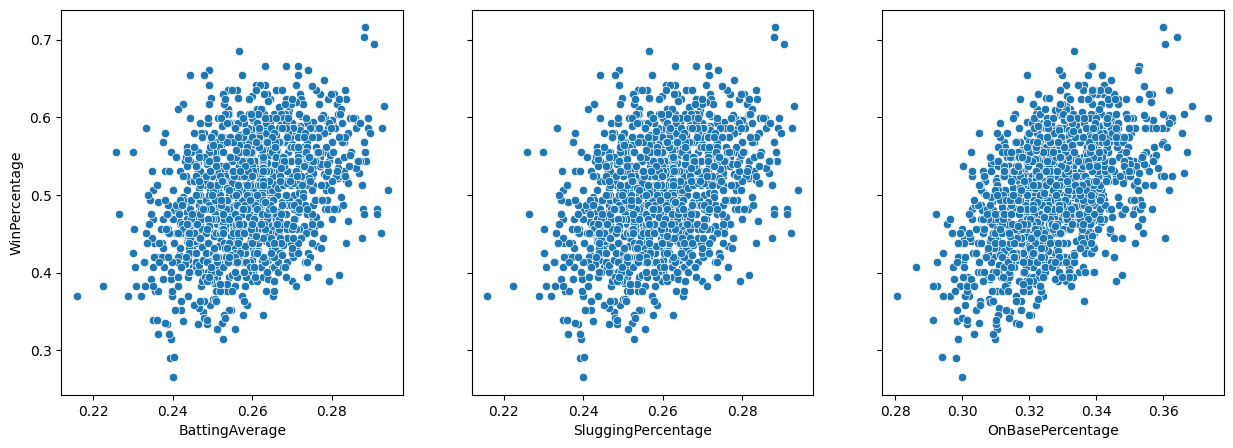

In [ ]:
#@title Run this cell to plot WinPercentage against our three metrics

plt.subplots(1, 3, figsize=(15, 5), sharey=True)

plt.subplot(1,3,1)
sns.scatterplot(x="BattingAverage", y = "WinPercentage", data=teams)

plt.subplot(1,3,2)
sns.scatterplot(x="SluggingPercentage", y = "WinPercentage", data=teams)

plt.subplot(1,3,3)
sns.scatterplot(x="OnBasePercentage", y = "WinPercentage", data=teams);

**Discuss**: Take a moment to look at these plots. What do you notice is different among them?

## Win Percentage and Team Performance Correlation

In baseball, understanding the relationship between various batting statistics and a team's overall performance is crucial. One way to explore these relationships is by examining the correlation between different batting metrics and the team's win percentage.

Run the cell below to calculate and display the correlation matrix as a **heatmap**, which will give you a sense of how each pair of variables is related! This visualization helps in quickly identifying strong or weak relationships between these metrics.

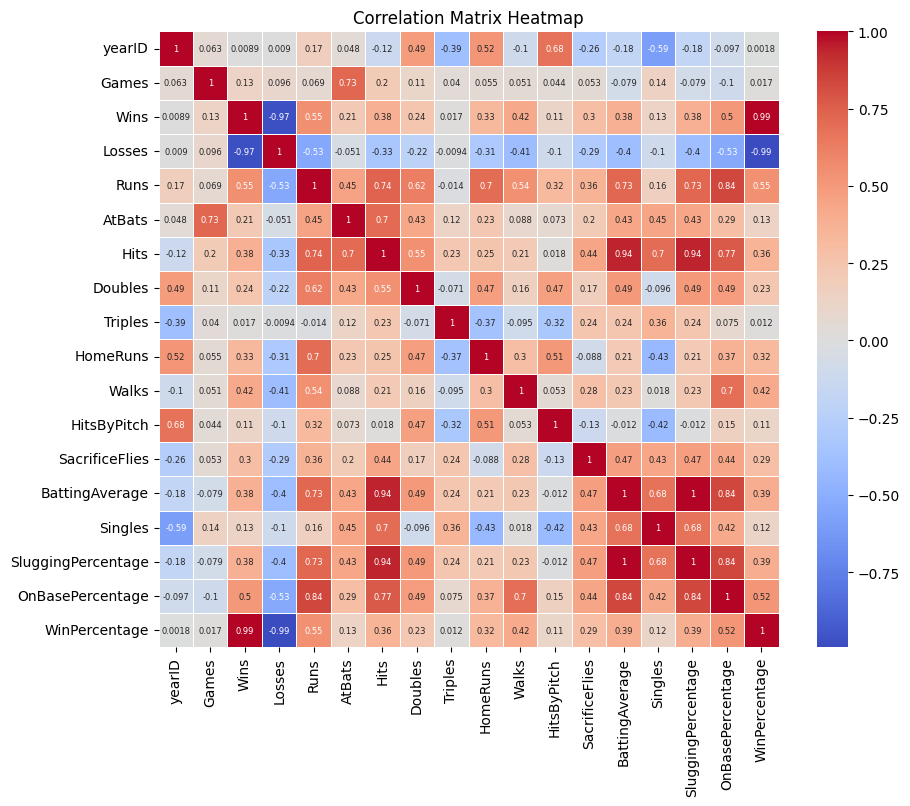

In [ ]:
#@title Run this cell to output the correlation matrix as a heatmap!
correlationMatrix = teams.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', linewidths=.5, annot_kws={"size": 6})
plt.title('Correlation Matrix Heatmap')
plt.show()

That's a ton of information! Here's a quick description on what this all means:

> **A correlation coefficient close to +1 indicates a strong positive correlation (as one statistic increases, so does the other), while a coefficient close to -1 indicates a strong negative correlation. A coefficient near 0 suggests little to no linear relationship.**

> Remember, correlation does not imply causation. These correlations can suggest relationships but do not confirm direct cause-and-effect.

### 💡 Discussion Questions

- Why are there 1s across the diagonal?
- Where are correlations otherwise highest? Does that make sense?

### ✍ Exercise: Investigating Correlations with Our Success Feature

As a final exercise, let's focus on the correlations with respect to our `'WinPercentage`' column! The easiest way to do this by calling the `.sort_values()` method on the `'WinPercentage'` column of the `correlationMatrix`. Try that out in the cell below!



In [ ]:
### YOUR CODE HERE
correlationMatrix['WinPercentage'].sort_values()

Losses               -0.993287
yearID                0.001795
Triples               0.012011
Games                 0.016704
HitsByPitch           0.108440
Singles               0.116550
AtBats                0.132543
Doubles               0.231028
SacrificeFlies        0.291337
HomeRuns              0.321760
Hits                  0.357351
BattingAverage        0.392946
SluggingPercentage    0.392946
Walks                 0.415233
OnBasePercentage      0.519003
Runs                  0.545430
Wins                  0.993453
WinPercentage         1.000000
Name: WinPercentage, dtype: float64

### 💡 Discussion Questions

- Are slugging percentage and on-base percentage useful features for success?
- Do the results match up with your guesses at the beginning of the notebook?
- What other interesting things do you notice?

# (Optional Challenge) Calculating $z$-Scores for Linear Model Coefficient Comparison


Something else we can look at to determine each metric's effect on `WinPercentage` is the predicted slope of the line when we fit a linear regression. There's one issue with this though: the metrics we've been focusing on (`BattingAverage`, `SluggingPercentage`, and `OnBasePercentage`) have different units! The interpretations of each metric are as follows:

- `BattingAverage`: expected number of hits per at-bat
- `SluggingPercentage`: expected number of bases reached per at-bat
- `OnBasePercentage`: expected number of times any base is reached per opportunity to get on-base

If we fit a linear regression for each of these, the slopes couldn't be directly compared, since a one-unit change in one of these metrics wouldn't be the same as a one-unit change in another!

To be able to compare these directly, we can calculate the ***$z$-score*** for each! This will shift the data so that they are all on the same scale. The $z$-score is calculated for each data point $x$ as follows:

$$ z = \frac{x - \mu}{\sigma} $$

where $\mu$ refers to the mean, or average, of all the data points, and $\sigma$ refers to the standard deviation, which describes how the data is spread out.

Run the cell below to get a sense of the center and spread of our three features. Talk through the code together to get a sense of how it works!

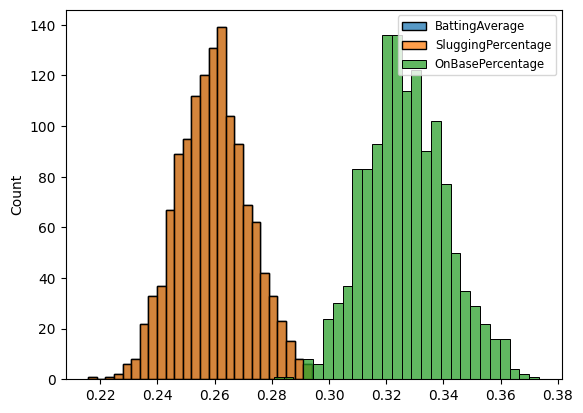

In [ ]:
for column_name in ['BattingAverage', 'SluggingPercentage', 'OnBasePercentage']:
  sns.histplot(x=column_name, data=teams, label=column_name)

plt.xlabel('')
plt.legend(fontsize='small')
plt.show()

### ✍ Exercise

While it's nice to get a sense of the data from this plot, let's take a second to get the actual numbers describing the mean and standard deviation.

In the code cell below, print the mean and standard deviation by calling the `.mean()` and `.std()` methods on the `BattingAverage` column.

In [ ]:
### YOUR CODE HERE
print(teams['BattingAverage'].mean())
print(teams['BattingAverage'].std())

0.2594885446618726
0.01231836797312275



Once you've figured that out, take a look at the statistics for the other two features and compare! The code will look pretty similar for all three statistics, so, as a bonus challenge, try to figure out how you could print these statistics with a for loop, as we did with the histogram plots above!

In [ ]:
### YOUR CODE HERE
for column_name in ['SluggingPercentage', 'OnBasePercentage']:
  print(column_name)
  print("  Mean:", teams[column_name].mean())
  print("  Std: ", teams[column_name].std())
  print()

SluggingPercentage
  Mean: 0.2594885446618726
  Std:  0.01231836797312275

OnBasePercentage
  Mean: 0.32687092900706444
  Std:  0.014235853233498524



### ✍ Exercise

Now that we have the pieces to the puzzle, let's make some new columns for those $z$-scores! Take a look at the plot and new statistics for these $z$-score columns using similar code as above. A for loop will also be helpful here!


In [ ]:
### YOUR CODE HERE
for column_name in ['BattingAverage', 'SluggingPercentage', 'OnBasePercentage']:
  teams[column_name + 'z'] = (teams[column_name] - teams[column_name].mean()) / teams[column_name].std()

teams.head(1)

,yearID,teamID,Name,Games,Wins,Losses,Runs,AtBats,Hits,Doubles,...,HitsByPitch,SacrificeFlies,BattingAverage,Singles,SluggingPercentage,OnBasePercentage,WinPercentage,BattingAveragez,SluggingPercentagez,OnBasePercentagez
0,1973,ATL,Atlanta Braves,162,76,85,799,5631,1497,219,...,34.0,46.0,0.26585,1038,0.26585,0.338503,0.469136,0.516401,0.516401,0.817092


### 💡 Discussion Question

What's changed about the data? What does it look like the $z$-score standardizes things to?


Now that we have the $z$-score information, we can take a look at the slopes of the linear models fit to each metric, as well as the $R^2$ score! We've provided the code for this in the cell below; all you need to do is fill in the list with your $z$-score column names!

In [ ]:
from sklearn.linear_model import LinearRegression

for z_score_column_name in ['BattingAveragez', 'SluggingPercentagez', 'OnBasePercentagez']: # <- YOUR CODE HERE: Fill in the list!
  linear_model = LinearRegression()
  linear_model.fit(teams[[z_score_column_name]], teams["WinPercentage"])

  print(z_score_column_name)
  print("  Slope:", linear_model.coef_[0])
  print("  R^2:  ", linear_model.score(teams[[z_score_column_name]], teams["WinPercentage"]))
  print()

BattingAveragez
  Slope: 0.027926413022316864
  R^2:   0.15440630844286718

SluggingPercentagez
  Slope: 0.027926413022316864
  R^2:   0.15440630844286718

OnBasePercentagez
  Slope: 0.036885223858093875
  R^2:   0.2693640129291215



### 💡 Discussion Question

Discuss the results! What extra information does this tell us about each of our metrics?

# Home Run! Congratulations on completing Notebook 1!

Whew, that was a lot of terminology to learn and data to work with! Having completed this notebook, you should now have a better sense of the game and how we can create new features to better predict success.

In the next notebook, we will start using these and other data to predict player salaries and choose the most undervalued players for your team!

As a bonus exercise in this notebook, you can take a look at the set-up cell code at the beginning of Milestone 2 to see how the data was processed! We ignored a lot of data, including defensive stats and seasons before 1973, so you're more than welcome to play around with that processing to explore more of the data! Pro tip: make sure you copy the original code to its own cell, for safekeeping and to use as a reference!


<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/b/bd/AdrianBeltreSwinging.jpg">